### Q1.Import the necessary libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Q2. Read the data as data frame

In [2]:
file_path = './insurance.csv'
data_frame = pd.read_csv(file_path, sep=',')
df = data_frame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q3. Perform basic EDA which should include the following  and print out your insights at every step.
### a. Shape of the data 

In [3]:
df.shape

(1338, 7)

## b. Data type of each attribute 

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## c. Checking the presence of missing values

In [6]:
print(df['age'])
print(df['age'].isnull())

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: age, Length: 1338, dtype: bool


In [7]:
print(df['sex'])
print(df['sex'].isnull())

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: sex, Length: 1338, dtype: bool


In [8]:
print(df['bmi'])
print(df['bmi'].isnull())

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool


In [9]:
print(df['children'])
print(df['children'].isnull())

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: children, Length: 1338, dtype: bool


In [10]:
print(df['smoker'])
print(df['smoker'].isnull())

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: smoker, Length: 1338, dtype: bool


In [11]:
print(df['region'])
print(df['region'].isnull())

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: region, Length: 1338, dtype: bool


In [12]:
print(df['charges'])
print(df['charges'].isnull())

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool


## d. 5 point summary of numerical attributes 

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

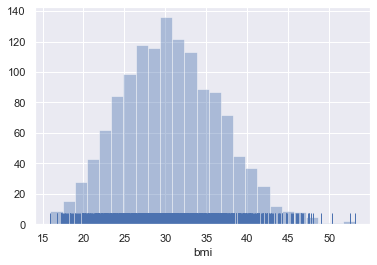

In [17]:
sns.set(color_codes=True)
sns.distplot(df['bmi'], kde=False, rug=True)

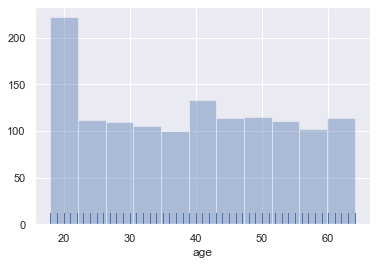

In [18]:
sns.distplot(df['age'], kde=False, rug=True)

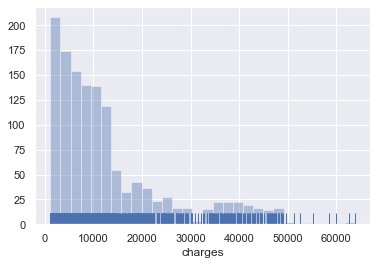

In [19]:
sns.distplot(df['charges'], kde=False, rug=True)

## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns 

In [20]:
df.skew(axis=0, skipna= True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

## or use the distplot to show skewness

In [21]:
sns.set(color_codes=True)

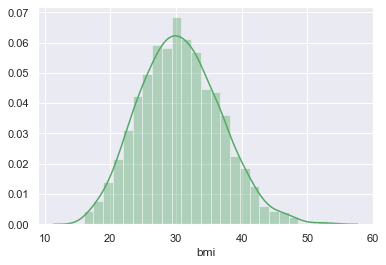

In [22]:
sns.distplot(df['bmi'], color= 'g')

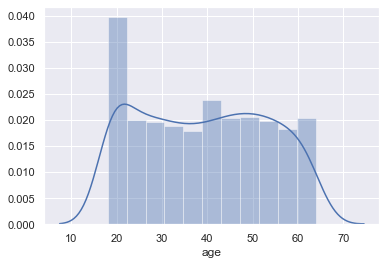

In [23]:
sns.distplot(df['age'], color= 'b')

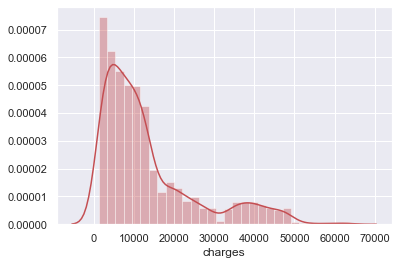

In [24]:
sns.distplot(df['charges'], color= 'r')

## g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns 

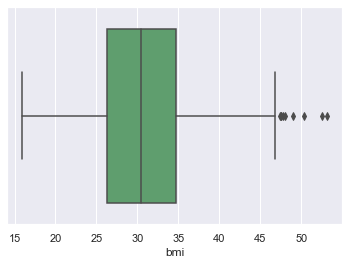

In [25]:
sns.boxplot(df['bmi'], color= 'g')

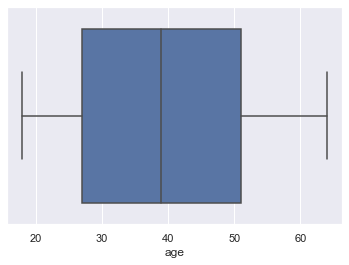

In [26]:
sns.boxplot(df['age'], color= 'b')

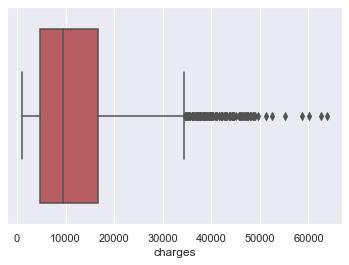

In [27]:
sns.boxplot(df['charges'], color= 'r')

## Distribution of categorical columns (include  children)  

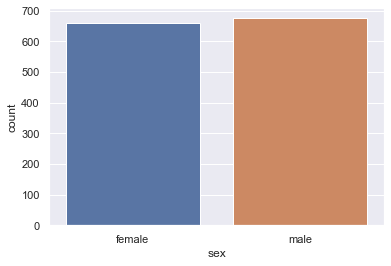

In [28]:
sns.countplot(df['sex'])

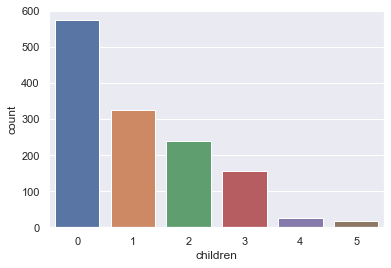

In [29]:
sns.countplot(df['children'])

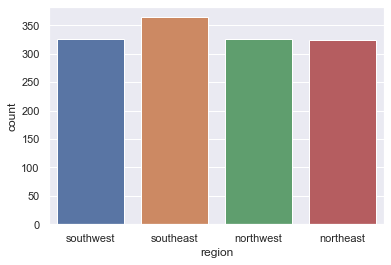

In [30]:
sns.countplot(df['region'])

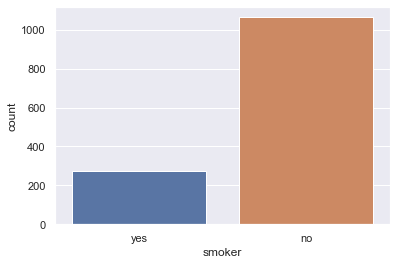

In [31]:
sns.countplot(df['smoker'])

## i. Pair plot that includes all the columns of the data  frame

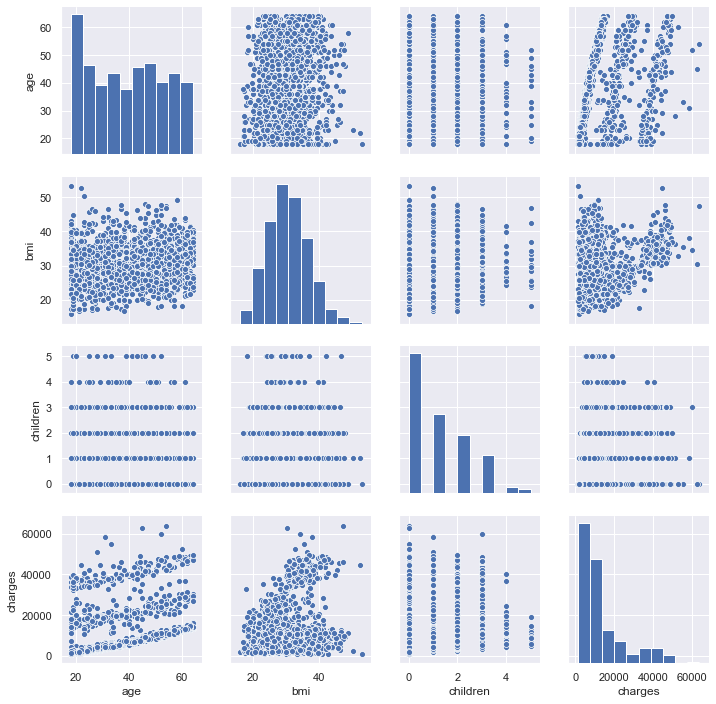

In [32]:
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

## Q4. Answer the following questions with statistical evidence
### a. Do charges of people who smoke differ significantly  from the people who don't? 

### Ans. Let H0(Null) - charges of people who smoke are equal to charges of people who donot smoke
###     H1(Alternate)- charges of people who smoke are significantly different from the charges of people who donot smoke
###      Confidence Interval of 95% is used (Set p-value = 0.05) has been set

In [33]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [34]:
from scipy.stats import ttest_ind
from statsmodels.stats.power import ttest_power

In [35]:
df_smoker=df[(df['smoker']=='yes')]
df_nonsmoker=df[(df['smoker']=='no')]
print(df_smoker['charges'].var())
print(df_nonsmoker['charges'].var())

133207311.20634921
35925420.49611172


In [36]:
stats.ttest_ind(df_smoker['charges'], df_nonsmoker['charges'],axis=0,equal_var=True,nan_policy='propagate')

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

### Reject this hypothesis since the calculated p value is 8.271435842177219e-283, which is < assumed p value 0.05
### hence proven that charges of people who smoke differ significantly  from the people who don't

## b. Does bmi of males differ significantly from that of  females? 

### Ans. Let H0(Null) - bmi of males are equal to females
###      H1(Alternate)- bmi of males are significantly different from females
###      Confidence Interval of 95% is used (Set p-value = 0.05) has been set

In [37]:
df.groupby('sex')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


In [38]:
df_female=df[(df['sex']=='female')]
df_male=df[(df['sex']=='male')]
print(df_female['bmi'].var())
print(df_male['bmi'].var())

36.554395153365576
37.70493727081969


In [39]:
stats.ttest_ind(df_female['bmi'], df_male['bmi'],axis=0,equal_var=True,nan_policy='propagate')

Ttest_indResult(statistic=-1.696752635752224, pvalue=0.08997637178984932)

### Reject this hypothesis since the calculated p value is 0.08997637178984932, which is > assumed p value 0.05
### hence proven that BMI of males differ significantly from the females

## c.Is the proportion of smokers significantly different  in different genders?

### Ans. Let H0(Null) - proportion of smokers is same accross different genders
###      H1(Alternate)- proportion of smokers is significantly different accross different genders
###      Confidence Interval of 95% is used (Set p-value = 0.05) has been set

In [40]:
pd.crosstab(df['sex'], df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [41]:
prop_array=np.array([[547,115],[517,159]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(prop_array)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value, deg_freedom))

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1


### Reject this hypothesis since the calculated p value is 0.006548, which is < assumed p value 0.05
### Based on the statistical evidence proportion of smokers is significantly different accross different genders

## d. Is the distribution of bmi across women with no  children, one child and two children, the same ?

### Ans. Let H0(Null) - m1 = m2 = m3, where m1, m2 and m3 are the BMI accross women with no children, 
###                     one child, no children respectively.
###      H1(Alternate)- atleast one m differs
###      Confidence Interval of 95% is used (Set p-value = 0.05) has been set 
### statsmodels.formula.api.ols creates a model from a formula and dataframe
### statsmodels.api.sm.stats.anova_lm gives an anova table for one more fitted model

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
df_female=df[(df['sex']=='female')]

In [46]:
df_bmi = ols('bmi ~ children', data = df_female).fit()
df_table = sm.stats.anova_lm(df_bmi, typ=2)
print(df_table)

                sum_sq     df        F    PR(>F)
children     11.855397    1.0  0.32399  0.569413
Residual  24150.599799  660.0      NaN       NaN


### Reject this hypothesis since the calculated p value is 0.569413, which is > assumed p value 0.05
### Based on the statistical evidence bmi across women with no  children, one child and two children varies